Supervised ( Regression & Classification ), 
Unsupervised

### Unsupervised

In [1]:
from sklearn.datasets import make_blobs

In [64]:
X,Y = make_blobs(n_features=2,n_samples=1000, centers=2)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

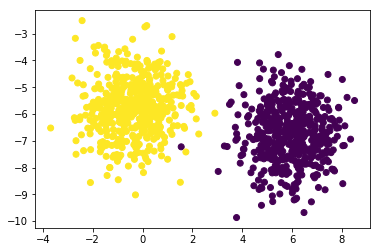

In [18]:
plt.scatter(X[:,0], X[:,1],c=Y)
plt.show()

In [19]:
from sklearn.neighbors import NearestNeighbors

In [20]:
nbrs = NearestNeighbors(n_neighbors=2,algorithm='ball_tree')

In [21]:
nbrs.fit(X)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=2, p=2, radius=1.0)

In [22]:
nbrs.kneighbors([[3,-3]])

(array([[1.34541438, 1.8184347 ]]), array([[420, 970]], dtype=int64))

In [26]:
X[420]

array([ 3.81099854, -4.07350883])

In [27]:
X[970]

array([ 1.18490499, -3.11015834])

In [28]:
import pandas as pd

In [31]:
house_data = pd.read_csv('house_rental_data.csv.txt',index_col='Unnamed: 0')

In [32]:
nbrs = NearestNeighbors(n_neighbors=4, n_jobs=-1)

In [33]:
nbrs.fit(house_data)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=-1, n_neighbors=4, p=2, radius=1.0)

In [34]:
nbrs.kneighbors(house_data[:2])

(array([[   0.        , 1010.6489949 , 1359.85616757, 1419.12994592],
        [   0.        ,    0.        ,   81.834     ,   81.834     ]]),
 array([[  0, 354, 319, 379],
        [358,   1, 460, 402]], dtype=int64))

In [35]:
house_data.iloc[0]

Sqft            1177.698
Floor              2.000
TotalFloor         7.000
Bedroom            2.000
Living.Room        2.000
Bathroom           2.000
Price          62000.000
Name: 1, dtype: float64

In [37]:
house_data.iloc[354]

Sqft            1031.82
Floor             11.00
TotalFloor        14.00
Bedroom            3.00
Living.Room        2.00
Bathroom           2.00
Price          61000.00
Name: 358, dtype: float64

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
std = StandardScaler()

In [41]:
house_data = std.fit_transform(house_data)

In [42]:
nbrs.fit(house_data)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=-1, n_neighbors=4, p=2, radius=1.0)

In [43]:
nbrs.kneighbors(house_data[:1])

(array([[0.        , 0.53659685, 0.55494995, 0.55830639]]),
 array([[  0, 178, 330, 259]], dtype=int64))

### Nearest Neighbors for Classification

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
nbrs = KNeighborsClassifier(n_neighbors=5,algorithm='kd_tree')

In [65]:
nbrs.fit(X,Y)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [71]:
nbrs.predict(X[:2])

array([1, 1])

In [67]:
nbrs.kneighbors(X[:2])

(array([[0.        , 0.29467026, 0.59588633, 0.63493555, 0.70393802],
        [0.        , 0.05506357, 0.07021934, 0.08325954, 0.13829085]]),
 array([[  0, 604,  71, 846, 939],
        [  1, 464, 428, 555, 207]], dtype=int64))

### Nearest Neighbors for Regression

In [50]:
from sklearn.datasets import make_regression

In [52]:
X,Y = make_regression(n_features=2, n_samples=1000)

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
nbrs = KNeighborsRegressor(n_neighbors=6, algorithm='kd_tree')

In [55]:
nbrs.fit(X,Y)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='uniform')

In [56]:
nbrs.predict(X[:2])

array([-265.16853662, -205.74157101])

In [57]:
Y[:2]

array([-298.97640054, -211.43749824])

### Identifying the Best Neighborhood size
* Too much will cause a lot of computation
* Too little will conclude it too early

In [80]:
from sklearn.datasets import load_iris
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [73]:
iris = load_iris()

In [74]:
standardscaler = StandardScaler()

In [77]:
data = standardscaler.fit_transform(iris.data)

In [79]:
from sklearn.pipeline import Pipeline

In [81]:
pipe = Pipeline([('standardscaling',standardscaler),('knn',knn)])

In [82]:
from sklearn.grid_search import GridSearchCV

In [83]:
params = [{'knn__n_neighbors': list(range(1,11)) }]

In [84]:
clf = GridSearchCV(pipe, params, cv=5)

In [85]:
clf.fit(iris.data,iris.target)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [86]:
clf.best_estimator_

Pipeline(memory=None,
     steps=[('standardscaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
           weights='uniform'))])

In [87]:
clf.best_params_

{'knn__n_neighbors': 6}

In [88]:
clf.best_score_

0.9666666666666667

### Radius Based Nearest Neighbor Classifier

In [89]:
from sklearn.neighbors import RadiusNeighborsClassifier

In [90]:
standard_scaler = StandardScaler()

In [91]:
f_data = standard_scaler.fit_transform(iris.data)

In [98]:
rnn = RadiusNeighborsClassifier(radius=.5, n_jobs=-1, outlier_label=-1)

In [99]:
rnn.fit(f_data, iris.target)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, outlier_label=-1, p=2, radius=0.5,
             weights='uniform')

In [100]:
rnn.predict([[1,1,10,10]])

array([-1])

In [97]:
help(RadiusNeighborsClassifier)

Help on class RadiusNeighborsClassifier in module sklearn.neighbors.classification:

class RadiusNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.RadiusNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  Classifier implementing a vote among neighbors within a given radius
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  radius : float, optional (default = 1.0)
 |      Range of parameter space to use by default for :meth:`radius_neighbors`
 |      queries.
 |  
 |  weights : str or callable
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query point will have a
 |        greater influence than neighbors which are further awa

In [101]:
from sklearn.externals import joblib

In [102]:
joblib.dump(rnn,'model.pkl')

['model.pkl']